# Chapter 8: Mappings & Sets

While [Chapter 7](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/07_sequences_00_lecture.ipynb) focuses on one special kind of *collection* types, namely *sequences*, this chapter introduces two more kinds: **Mappings** and **sets**. We present the data types belonging to these two groups in one chapter as they share the *same* underlying implementation at the C Level, known as **[hash tables](https://en.wikipedia.org/wiki/Hash_table)**.

The most important mapping type in this chapter is the `dict` type that we have not yet seen before (cf, [documentation](https://docs.python.org/3/library/stdtypes.html#dict)). It is an essential part in a data science practitioner's toolbox for two reasons: First, Python employs `dict` objects basically "everywhere" internally. So, we must understand how they work to become better at Python in general. Second, after the many concepts related to *sequential* data, the ideas behind *mappings* enhance our general problem solving skills. As a concrete example, we look at the concept of **memoization** to complete our picture of *recursion*, as depicted in [Chapter 4](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/04_iteration_00_lecture.ipynb#Recursion). We end this chapter with a discussion of *set* types.

## The `dict` Type

A *mapping* is a one-to-one correspondence from a set of **keys** to a set of **values**. In other words, a *mapping* is a *collection* of **key-value pairs**, also called **items** for short.

In the context of mappings, the term *value* has a meaning different from the general *value* that *every* object has: In the "bag" analogy from [Chapter 1](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/01_elements_00_lecture.ipynb#Value), we descibe an object's value to be the concrete $0$s and $1$s it contains. Here, the terms *key* and *value* mean the *role* an object takes within a mapping. Both, *keys* and *values*, are real *objects* with a distinct *value*. So, the student should always remember the double meaning of the term *value* in this chapter!

Let's continue with an example. To create a `dict` object, we commonly use the literal notation, `{..: .., ..: .., ...}`, and list all the items. `to_words` below maps the `int` objects `0`, `1`, and `2` to their English word equivalents, `"zero"`, `"one"`, and `"two"`, and `from_words` does the opposite. A stylistic side note: Pythonistas often expand `dict` or `list` definitions by writing each item or element on a line on their own. The commas `,` after the *last* items are *not* a mistake, as well, although they *may* be left out. Besides easier reading, such style has actual technical advantages (cf., [source](https://www.python.org/dev/peps/pep-0008/#when-to-use-trailing-commas)) that we do not go into detail about here.

In [1]:
to_words = {
    0: "zero",
    1: "one",
    2: "two",
}

In [2]:
from_words = {
    "zero": 0,
    "one": 1,
    "two": 2,
}

As before, `dict` objects are objects on their own: They have an identity, a type, and a value. The latter is a *literal* that creates a *new* `dict` object with the *same* value when evaluated.

In [3]:
id(from_words)

139953979690352

In [4]:
type(from_words)

dict

In [5]:
from_words

{'zero': 0, 'one': 1, 'two': 2}

The [dict()](https://docs.python.org/3/library/functions.html#func-dict) built-in gives us an alternative way to create a `dict` object. It is versatile and can be used in different ways.

First, we may pass it any *mapping* type, for example, a `dict` object, to obtain a *new* `dict` object. That is the easiest way to convert a more specialized mapping type, such as the `OrderedDict`, `defaultdict`, and `Counter` types introduced further below, into an "ordinary" `dict` object.

In [6]:
dict(from_words)

{'zero': 0, 'one': 1, 'two': 2}

Second, we may pass it an *iterable* of *iterables* with *two* elements each. So, both of the following two code cells work: A `list` of `tuple` objects, or a `tuple` of `list` objects. More importantly, we could use an *iterator*, for example, a `generator` object, that produces the inner iterables "on the fly."

In [7]:
dict([("zero", 0), ("one", 1), ("two", 2)])

{'zero': 0, 'one': 1, 'two': 2}

In [8]:
dict((["zero", 0], ["one", 1], ["two", 2]))

{'zero': 0, 'one': 1, 'two': 2}

Lastly, [dict()](https://docs.python.org/3/library/functions.html#func-dict) may also be called with *keyword* arguments: The keywords become the keys and the arguments the values.

In [9]:
dict(zero=0, one=1, two=2)

{'zero': 0, 'one': 1, 'two': 2}

Keyword arguments may always be added in the first two cases as well. That is sometimes useful to take data as is and ensure that certain keys are *existent* and have a pre-defined value.

In [10]:
dict(from_words, three=3)

{'zero': 0, 'one': 1, 'two': 2, 'three': 3}

### Nested Data

Often, `dict` objects occur in a nested form and combined with other collection types, such as `list` or `tuple` objects, to model more complex "objects" from the real world.

The reason for this popularity is that many modern [ReST APIs](https://en.wikipedia.org/wiki/Representational_state_transfer#Applied_to_Web_services) on the internet (e.g., [Google Maps API](https://cloud.google.com/maps-platform/), [Yelp API](https://www.yelp.com/developers/documentation/v3), [Twilio API](https://www.twilio.com/docs/usage/api)) provide their data in the popular [JSON](https://en.wikipedia.org/wiki/JSON) format, which looks almost like a combination of `dict` and `list` objects in Python. 

The `people` example below models three groups of people: Mathematicians, physicists, and programmers. Each person may have an arbitrary number of email addresses (e.g., [Leonhard Euler](https://en.wikipedia.org/wiki/Leonhard_Euler) has not lived long enough to get one, whereas [Guido](https://en.wikipedia.org/wiki/Guido_van_Rossum) has more than one for sure).

`people` has many (implicit) structural assumptions built in. For example, there are a [one-to-many](https://en.wikipedia.org/wiki/One-to-many_%28data_model%29) relationship between people and their email addresses and a [one-to-one](https://en.wikipedia.org/wiki/One-to-one_%28data_model%29) relationship between each person and their name. It is important to understand that we determine this structure by choosing the data types involved in `people` and that it is impossible to model nested data without any (implicit) assumption about the structure. So, the data science practitioner should have a basic understanding of [database normalization](https://en.wikipedia.org/wiki/Database_normalization).

In [11]:
people = {
    "mathematicians": [
        {
            "name": "Gilbert Strang",
            "emails": ["gilbert@mit.edu"],
        },
        {
            "name": "Leonhard Euler",
            "emails": [],
        },
    ],
    "physicists": [],
    "programmers": [
        {
            "name": "Guido",
            "emails": ["guido@python.org", "guido@dropbox.com"],
        },
    ],
}

The literal notation of such a nested `dict` object may be hard to read.

In [12]:
people

{'mathematicians': [{'name': 'Gilbert Strang', 'emails': ['gilbert@mit.edu']},
  {'name': 'Leonhard Euler', 'emails': []}],
 'physicists': [],
 'programmers': [{'name': 'Guido',
   'emails': ['guido@python.org', 'guido@dropbox.com']}]}

Luckily, the [pprint](https://docs.python.org/3/library/pprint.html) module in the [standard library](https://docs.python.org/3/library/index.html) provides a [pprint()](https://docs.python.org/3/library/pprint.html#pprint.pprint) function for "pretty printing."

In [13]:
from pprint import pprint

In [14]:
pprint(people, indent=1, width=60)

{'mathematicians': [{'emails': ['gilbert@mit.edu'],
                     'name': 'Gilbert Strang'},
                    {'emails': [],
                     'name': 'Leonhard Euler'}],
 'physicists': [],
 'programmers': [{'emails': ['guido@python.org',
                             'guido@dropbox.com'],
                  'name': 'Guido'}]}


### Hash Tables & Key Hashability

In [Chapter 0](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/00_intro_00_lecture.ipynb#Isn't-C-a-lot-faster?), we argue that a major advantage of using Python is that it takes care of the memory managment for us. In line with that, we have never talked about the C level implementation thus far in the book. However, the `dict` type, among others, exhibits some behaviors that may seem "weird" for a beginner. To built a solid intuition that enables the student to better "predict" how `dict` objects behave, we describe the underlying implementation details on a conceptual level (i.e., without C code).

The first unintuitive behavior is that we may *not* use a *mutable* object as a key. That results in a `TypeError`.

In [15]:
{
    [0, 1]: ["zero", "one"],
}

TypeError: unhashable type: 'list'

Similarly surprising is that items with the *same* key get "merged" together. The resulting `dict` object seems to keep the position of the *first* mention of a key, while at the same time only the *last* mention of a value survives.

In [16]:
{
    "zero": 0,
    "one": 1,
    "two": 2,
    "zero": 3,
}

{'zero': 3, 'one': 1, 'two': 2}

The reason for that is that the main building block behind the `dict` type is a [data structure](https://en.wikipedia.org/wiki/Data_structure) called a [hash table](https://en.wikipedia.org/wiki/Hash_table).

Conceptually, when we create a *new* `dict` object, Python creates a "bag" in memory that takes significantly more space (i.e., $0$s and $1$s) than needed to store the references to all the key and value objects. This bag is a **contiguous** chunk of memory (i.e., all the $0$s and $1$s lie right next to each other) and divided into equally sized **buckets** that have just enough space to store *two* references each. These references go to an item's key and value objects. The buckets are labeled with *index* numbers, or "integer addresses." Because Python knows how wide each bucket is and where the bag begins, it can jump directly into *any* bucket by calculating its **offset** from the start. It does not have to follow a reference to some "random" memory location once it has followed the reference to the `dict` object's "start" in memory.

The figure below visualizes how we should think of hash tables. An empty `dict` object, created with the literal `{}`, still takes a lot of memory: It is essentially one big, contiguous, and empty table.

|  Bucket |  0  |  1  |  2  |  3  |  4  |  5  |  6  |  7  |
|  :---:  |:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| **Key** |*...*|*...*|*...*|*...*|*...*|*...*|*...*|*...*|
|**Value**|*...*|*...*|*...*|*...*|*...*|*...*|*...*|*...*|

To insert a key-value pair, the key must be translated into a bucket's address. As the first step to do so, the built-in [hash()](https://docs.python.org/3/library/functions.html#hash) function maps any **hashable** object to its **hash value**, a long `int` number, similar to the ones returned by the built-in [id()](https://docs.python.org/3/library/functions.html#id) function. This hash value is a summary of all the $0$s and $1$s that make up an object's value, and, according to the official [glossary](https://docs.python.org/3/glossary.html#term-hashable), an object is hashable *only if* "it has a hash value which *never* changes during its *lifetime*." So, hashability implies immutability! This formal requirement is also absolutely useful to have: Without it, an object may have *several* addresses and, thus, we could not sort it into a *predictable* bucket. The exact logic behind [hash()](https://docs.python.org/3/library/functions.html#hash) is beyond the scope of this book.

Let's calculate the hash value of `"zero"`. Because `str` objects are immutable, that works. Hash values have *no* semantic meaning. Also, everytime we re-start Python, we see *different* hash values for the *same* objects. That is a security measure, and we do not go into the technicalities here (cf. [source](https://docs.python.org/3/using/cmdline.html#envvar-PYTHONHASHSEED)).

In [17]:
hash("zero")

-1033934764475250610

For numeric objects, we can sometimes predict the hash values. However, we must *never* interpret any meaning into them.

In [18]:
hash(0)

0

In [19]:
hash(0.1)

230584300921369408

The [glossary](https://docs.python.org/3/glossary.html#term-hashable) states a second requirement for hashability, namely that "objects which *compare equal* must have the *same* hash value." The purpose of this is to ensure that if we put, for example, `1` as a key in a `dict` object, we can look it up later with `1.0`. In other words, we can look up keys by their object's value (i.e., in the meaning of [Chapter 1](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/01_elements_00_lecture.ipynb#Value)). The converse statement does *not* hold: Two objects *may* (accidentally) have the *same* hash value and *not* compare equal.

In [20]:
1 == 1.0

True

In [21]:
hash(1) == hash(1.0)

True

Because `list` objects are not immutable, they are *never* hashable, as indicated by the `TypeError`.

In [22]:
hash([0, 1])

TypeError: unhashable type: 'list'

If we need keys composed of several objects, we can use `tuple` objects instead. In general, the key object must be hashable as a whole. So, we must *never* put a *mutable* object in a `tuple` object used as a key, as well.

In [23]:
hash((0, 1))

3713080549409410656

There is no such restiction on objects inserted into `dict` objects as *values*.

In [24]:
{
    (0, 1): ["zero", "one"],
}

{(0, 1): ['zero', 'one']}

A natural question to ask is how does Python know how much memory it should reserve for a `dict` object's hash table. And, the answer is: Python allocates the memory according to some internal heuristics, and whenever a hash table is roughly 2/3 full, it creates a *new* one with twice the space, and re-inserts all items, one by one, from the *old* one. So, during its lifetime, a `dict` object may have several hash tables.

Let's see how Python translates the keys' hash values into buckets and what happens if a hash table gets too crowded. Assume the now bigger `from_words` example ...

In [25]:
from_words = {
    "zero": 0,
    "one": 1,
    "two": 2,
    "three": 3,
    "four": 4,
    "five": 5,
}

... is to be stored in a hash table with eight buckets. Thus, to label the buckets, we need three bits (i.e., $2^3 = 8$).

Once Python has obtained an object's hash value with [hash()](https://docs.python.org/3/library/functions.html#hash), that number's *least* significant bits in *binary* representation are used as the address. So, here, we cut off the last three digits. These digits could be converted back into an integer for nicer presentation, but Python itself does not need that.

In summary, with a potentially infinite number of possible keys being mapped on a limited number of buckets, there is a chance that two or more keys end up in the *same* bucket. That is called a **hash collision** and sounds worse than it is. In such cases, Python uses a perturbation rule to rearrange the bits, and if the corresponding next bucket is empty, places an item there. The main disadvantage of that is that the nice offsetting logic from above breaks down, and Python needs more time on average to place items into a hash table. The remedy is to just use a bigger hash table as then the chance of colliding hashes decreases. Luckily, Python does all that for us in the background. So, the main cost we pay for that convenience is the *high* memory usage of `dict` objects.

Another effect of this hashing logic is that items that have keys with the *same* value (i.e., $0$s and $1$s) end up in the *same* bucket, as well. The item that gets inserted last *overwrites* all previously inserted items. That is why the two `"zero"` keys get "merged" above.

The code below shows how the key objects are transformed into their hash values in integer and binary representation, the least significant bits of the latter are cut off, and the buckets are obtained. Because we use `str` objects as the keys, their buckets are *unpredictable*. So, taking into account the randomization for security purposes from above, we may or may not see redundant buckets in the output. The chance is rather high.

In [26]:
def buckets(mapping, *, bits):
    """Calculate the bucket indices for a mapping's keys."""
    for key in mapping:  # cf., next sub-section for details on looping
        hash_value = hash(key)
        binary = bin(hash_value)
        address = binary[-bits:]
        bucket = int("0b" + address, base=2)
        print(key, hash_value, "0b..." + binary[-12:], address, bucket, sep="\t")

In [27]:
buckets(from_words, bits=3)

zero	-1033934764475250610	0b...011110110010	010	2
one	-3496683303036773129	0b...001100001001	001	1
two	-4468022785493412346	0b...100111111010	010	2
three	1491334499222274950	0b...001110000110	110	6
four	490235692124377396	0b...000100110100	100	4
five	-550474145318920636	0b...000110111100	100	4


With five of the six keys already inserted, the next insertion has a chance of more than 50% to be a hash collision.

|  Bucket |   0   |  1  |   2   |   3    |  4  |    5    |  6  |    7   |
|  :---:  | :---: |:---:| :---: | :---:  |:---:|  :---:  |:---:|  :---: |
| **Key** |`"one"`|*...*|`"two"`|`"four"`|*...*|`"three"`|*...*|`"zero"`|
|**Value**|  `1`  |*...*|  `2`  |  `4`   |*...*|   `3`   |*...*|   `0`  |

Luckily, in the given case, Python allocates sixteen buckets trading off memory against insertion speed.

|  Bucket |   0   |  1  |  2  |  3  |  4  |  5  |  6  |    7   |  8  |  9  |  10   |   11   |  12 |    13   |  14 |   15   |
|  :---:  | :---: |:---:|:---:|:---:|:---:|:---:|:---:|  :---: |:---:|:---:| :---: |  :---: |:---:|  :---:  |:---:|  :---: |
| **Key** |`"one"`|*...*|*...*|*...*|*...*|*...*|*...*|`"five"`|*...*|*...*|`"two"`|`"four"`|*...*|`"three"`|*...*|`"zero"`|
|**Value**|  `1`  |*...*|*...*|*...*|*...*|*...*|*...*|   `5`  |*...*|*...*|  `2`  |   `4`  |*...*|   `3`   |*...*|   `0`  |

Sixteen buckets imply four bits (i.e., $2^4$) be cut off from the hash value's binary representation and used as the buckets' indices. It is unlikely we see redundant buckets in the code cell below.

In [28]:
buckets(from_words, bits=4)

zero	-1033934764475250610	0b...011110110010	0010	2
one	-3496683303036773129	0b...001100001001	1001	9
two	-4468022785493412346	0b...100111111010	1010	10
three	1491334499222274950	0b...001110000110	0110	6
four	490235692124377396	0b...000100110100	0100	4
five	-550474145318920636	0b...000110111100	1100	12


Although hash tables seem quite complex at first sight, they help us to make certain operations very fast as we see further below.

### Mappings are Collections without "Predictable" Order

In [Chapter 7](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/07_sequences_00_lecture.ipynb#Collections-vs.-Sequences), we show how *sequences* are a special kind of *collections*. The latter can be described as iterable containers with a finite number of elements.

The `dict` type is a special kind of a *collection*, as well, as revealed with the `Collection` ABC from the [collections.abc](https://docs.python.org/3/library/collections.abc.html) module in the [standard library](https://docs.python.org/3/library/index.html).

In [29]:
import collections.abc as abc

In [30]:
isinstance(to_words, abc.Collection)

True

In [31]:
isinstance(from_words, abc.Collection)

True

So, we may pass `to_words` or `from_words` to the built-in [len()](https://docs.python.org/3/library/functions.html#len) function to obtain the number of *items* they contain.

In [32]:
len(to_words)

3

In [33]:
len(from_words)

6

In the terminology of the [collections.abc](https://docs.python.org/3/library/collections.abc.html) module, both are `Sized` objects.

In [34]:
isinstance(to_words, abc.Sized)

True

In [35]:
isinstance(from_words, abc.Sized)

True

`dict` objects may be looped over, for example, with the `for` statement. For technical reasons, we could *not* rely on the iteration order to be *predictable* in any form until Python 3.7 in 2018. Looping over the *same* `dict` objects multiple times during its lifetime could result in *different* iteration orders every time. That behavior is intentional as `dict` objects are optimized for use cases where order does not matter. Starting with Python 3.7, `dict` objects remember the order in that items are *inserted* (cf., [Python 3.7 release notes](https://www.python.org/downloads/release/python-370/)). A lot of research went into this preservation of order (cf., this [PyCon 2017 talk](https://www.youtube.com/watch?v=npw4s1QTmPg) by core developer [Raymond Hettinger](https://github.com/rhettinger)).

Because of that, the order in the two `for`-loops below is the *same* as in the *source code* that defines `to_words` and `from_words` above. In that sense, it is "*predictable*." However, if we fill `dict` objects with data from real-world sources, that kind of predictability is not really helpful as such data are not written as source code, and, thus, we consider the order of items in `dict` objects to be *unpredictable*. Further, when an "insertion" accidentally *updates* an item, the ordering remains unchanged.

In [36]:
!python --version  # the order in the for-loops is predictable only for Python 3.7 or higher

Python 3.7.4


By convention, iteration goes over the *keys* in the `dict` object only. The "*Dictionary Methods*" sub-section below shows how to loop over the *items* or the *values* instead.

In [37]:
for number in to_words:
    print(number)

0
1
2


In [38]:
for word in from_words:
    print(word)

zero
one
two
three
four
five


Without a predictable *forward* order, `dict` objects are not *reversible* either.

So, passing a `dict` object to the [reversed()](https://docs.python.org/3/library/functions.html#reversed) built-in raises a `TypeError` ...

In [39]:
for number in reversed(to_words):
    print(number)

TypeError: 'dict' object is not reversible

In [40]:
for word in reversed(from_words):
    print(word)

TypeError: 'dict' object is not reversible

... and also `Reversible` ABC in the [collections.abc](https://docs.python.org/3/library/collections.abc.html) module confirms that.

In [41]:
isinstance(to_words, abc.Reversible)

False

In [42]:
isinstance(from_words, abc.Reversible)

False

Of course, we could use the built-in [sorted()](https://docs.python.org/3/library/functions.html#sorted) function to loop over, for example, `to_words` in a *predictable* order. However, that *materializes* a temporary `list` object in memory containing references to all the key objects *and* creates a *new* order according to some sorting criterion that has *nothing* to do with how the items are ordered inside the hash table.

In [43]:
for word in sorted(from_words):
    print(word)

five
four
one
three
two
zero


That approach may be combined with [reversed()](https://docs.python.org/3/library/functions.html#reversed).

In [44]:
for word in reversed(sorted(from_words)):
    print(word)

zero
two
three
one
four
five


To show the third behavior of *collection* types, we use the boolean `in` operator to check if a given and immutable object evaluates equal to a *key* in `to_words` or `from_words`.

In [45]:
1 in to_words

True

In [46]:
1.0 in to_words  # 1.0 is not contained but compares equal to a key that is

True

In [47]:
10 in to_words

False

In [48]:
"one" in from_words

True

In [49]:
"ten" in from_words

False

The `Container` ABC in the [collections.abc](https://docs.python.org/3/library/collections.abc.html) module may be used to "ask" Python to confirm that `to_words` and `from_words` are indeed *container* types.

In [50]:
isinstance(to_words, abc.Container)

True

In [51]:
isinstance(from_words, abc.Container)

True

#### Membership Testing: Lists vs. Dictionaries

Because of the [hash table](https://en.wikipedia.org/wiki/Hash_table) implementation, the `in` operator is *extremely* fast: With the hashing/offsetting described above, Python does *not* need to initiate a [linear search](https://en.wikipedia.org/wiki/Linear_search) as in the `list` case but immediately knows the only places in memory where the searched object must be located if present in the hash table at all. Conceptually, that is like comparing the searched object against all key objects with the `==` operator *without* actually doing it.

To show the difference, we run a little experiment. For that, we create a `haystack`, a `list` object, with `10_000_001` elements in it, *one* of which is the `needle`, namely `42`. Once again, the [randint()](https://docs.python.org/3/library/random.html#random.randint) function in the [random](https://docs.python.org/3/library/random.html) module is helpful.

In [52]:
import random

In [53]:
random.seed(87)

In [54]:
needle = 42

In [55]:
haystack = [random.randint(99, 9999) for _ in range(10_000_000)]
haystack.append(needle)

We put the elements in `haystack` in a *random* order with the [shuffle()](https://docs.python.org/3/library/random.html#random.shuffle) function in the [random](https://docs.python.org/3/library/random.html) module.

In [56]:
random.shuffle(haystack)

In [57]:
haystack[:10]

[8126, 7370, 3735, 213, 7922, 1434, 8557, 9609, 9704, 9564]

In [58]:
haystack[-10:]

[7237, 886, 5945, 4014, 4998, 2055, 3531, 6919, 7875, 1944]

As modern computers are generally fast, we search the `needle` a total of `10` times.

In [59]:
%%timeit -n 1 -r 1
for _ in range(10):
    needle in haystack

4.32 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Now, we convert the elements of `haystack` into the keys of `magic_haystack`, a `dict` object. We use `None` as a dummy value for all items.

In [60]:
magic_haystack = dict((x, None) for x in haystack)

To show the *massive* effect of the hash table implementation, we search the `needle` not `10` but `10_000_000` times. The code cell still runs in only a fraction of the time its counterpart does above.

In [61]:
%%timeit -n 1 -r 1
for _ in range(10_000_000):
    needle in magic_haystack

419 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


However, there is no fast way to look up the values the keys are mapped to. To achieve that, we have to loop over *all* items and check for each value object if it evaluates equal to searched object. That is, by definition, a linear search, as well, and rather slow. In the context of `dict` objects, we call that a **reverse look-up**.

### "Indexing" -> Key Look-up

The same efficient key look-up executed in the background with the `in` operator is also behind the indexing operator `[]`. Instead of returning either `True` or `False`, it returns the value object the looked up key maps to.

To show the similarity to indexing into `list` objects, we provide another example with `to_words_list` below.

In [62]:
to_words_list = ["zero", "one", "two"]

Without the above definitions, we could not tell the difference between `to_words` and `to_words_list`: The usage of the `[]` is the same.

In [63]:
to_words[0]

'zero'

In [64]:
to_words_list[1]

'one'

Because key objects can be of any immutable type and are, in particular, not constrained to just the `int` type, the word "*indexing*" is an understatement here. Therefore, in the context of `dict` objects, we view the `[]` operator as a generalization of the indexing operator and refer to it as the **(key) look-up** operator. 

In [65]:
from_words["two"]

2

If a key is not in a `dict` object, Python raises a `KeyError`. A sequence type would raise an `IndexError` in this situation.

In [66]:
from_words["drei"]

KeyError: 'drei'

While `dict` objects support the `[]` operator to look up a *single* key, the more general concept of *slicing* is *not* available. That is in line with the idea that there is *no* predictable *order* associated with a `dict` object's keys, and slicing requires an order conceptually.

To access "lower" levels in nested data, like `people`, we *chain* the look-up operator `[]`. For example, let's view all the mathematicians in `people`.

In [67]:
people["mathematicians"]

[{'name': 'Gilbert Strang', 'emails': ['gilbert@mit.edu']},
 {'name': 'Leonhard Euler', 'emails': []}]

Let's take the first mathematician on the list, ...

In [68]:
people["mathematicians"][0]

{'name': 'Gilbert Strang', 'emails': ['gilbert@mit.edu']}

... and output his name ...

In [69]:
people["mathematicians"][0]["name"]

'Gilbert Strang'

... or all his emails.

In [70]:
people["mathematicians"][0]["emails"]

['gilbert@mit.edu']

### Mutability

Analogous to `list` objects, we may mutate `dict` objects *in place*.

For example, let's translate the English words in `to_words` to their German counterparts. Behind the scenes, Python determines the bucket of the objects passed to the `[]` operator, looks them up in the hash table, and, if present, *updates* their references to the mapped value objects.

In [71]:
to_words[0] = "null"
to_words[1] = "eins"
to_words[2] = "zwei"

In [72]:
to_words

{0: 'null', 1: 'eins', 2: 'zwei'}

Let's add two more items. Again, Python determines their buckets, but this time finds them to be empty, and *inserts* the references to their key and value objects.

In [73]:
to_words[3] = "drei"
to_words[4] = "vier"

In [74]:
to_words

{0: 'null', 1: 'eins', 2: 'zwei', 3: 'drei', 4: 'vier'}

None of these operations change the identity of the `to_words` object.

In [75]:
id(to_words)  # same memory location as before

139953979638320

The `del` statement removes individual items. Python just removes the *two* references to the key and value objects in the corresponding bucket.

In [76]:
del to_words[0]

In [77]:
to_words

{1: 'eins', 2: 'zwei', 3: 'drei', 4: 'vier'}

We may also change parts of nested data, such as `people`.

For example, let's add [Albert Einstein](https://en.wikipedia.org/wiki/Albert_Einstein) to the list of physicists, ...

In [78]:
people["physicists"].append({"name": "Albert Einstein"})

... complete Guido's name, ...

In [79]:
people["programmers"][0]["name"] = "Guido van Rossum"

... and remove his work email because he retired.

In [80]:
del people["programmers"][0]["emails"][1]

Now, `people` looks like this.

In [81]:
pprint(people, indent=1, width=60)

{'mathematicians': [{'emails': ['gilbert@mit.edu'],
                     'name': 'Gilbert Strang'},
                    {'emails': [],
                     'name': 'Leonhard Euler'}],
 'physicists': [{'name': 'Albert Einstein'}],
 'programmers': [{'emails': ['guido@python.org'],
                  'name': 'Guido van Rossum'}]}


### Dictionary Methods

`dict` objects come with many methods bound on them (cf., [documentation](https://docs.python.org/3/library/stdtypes.html#dict)), many of which are standardized by the `Mapping` and `MutableMapping` ABCs from the [collections.abc](https://docs.python.org/3/library/collections.abc.html) module. While the former requires a data type adhering to it to implement the [keys()](https://docs.python.org/3/library/stdtypes.html#dict.keys), [values()](https://docs.python.org/3/library/stdtypes.html#dict.values), [items()](https://docs.python.org/3/library/stdtypes.html#dict.items), and [get()](https://docs.python.org/3/library/stdtypes.html#dict.get) methods, which *never* mutate an object, the latter formalizes the [update()](https://docs.python.org/3/library/stdtypes.html#dict.update), [pop()](https://docs.python.org/3/library/stdtypes.html#dict.pop), [popitem()](https://docs.python.org/3/library/stdtypes.html#dict.popitem), [clear()](https://docs.python.org/3/library/stdtypes.html#dict.clear), and [setdefault()](https://docs.python.org/3/library/stdtypes.html#dict.setdefault) methods, which *may* do so.

In [82]:
isinstance(to_words, abc.Mapping)

True

In [83]:
isinstance(from_words, abc.Mapping)

True

While iteration over a mapping type goes over its keys, we may emphasize this explicitly by adding the [keys()](https://docs.python.org/3/library/stdtypes.html#dict.keys) method in the `for`-loop. Again, the iteration order is equivalent to the insertion order but still considered *unpredictable*.

In [84]:
for word in from_words.keys():
    print(word)

zero
one
two
three
four
five


[keys()](https://docs.python.org/3/library/stdtypes.html#dict.keys) returns an object of type `dict_keys`. That is a dynamic **view** inside the `from_words`'s hash table, which means it does *not* copy the references to the keys, and changes to `from_words` can be seen through it. View objects behave much like `dict` objects themselves.

In [85]:
from_words.keys()

dict_keys(['zero', 'one', 'two', 'three', 'four', 'five'])

iews can be materialized with the [list()](https://docs.python.org/3/library/functions.html#func-list) built-in. However, that may introduce *semantic* errors into a program an the newly created `list` object has a "*predictable*" order (i.e., indexes `0`, `1`, ...) created from an *unpredictable* one.

In [86]:
list(from_words.keys())

['zero', 'one', 'two', 'three', 'four', 'five']

To loop over the value objects instead, we use the [values()](https://docs.python.org/3/library/stdtypes.html#dict.values) method. That returns a *view* on the value objects inside `from_words` without copying the references to them.

In [87]:
for number in from_words.values():
    print(number)

0
1
2
3
4
5


In [88]:
from_words.values()

dict_values([0, 1, 2, 3, 4, 5])

To loop over key-value pairs, we invoke the [items()](https://docs.python.org/3/library/stdtypes.html#dict.items) method. That returns a view on the key-value pairs as `tuple` objects, where the first element is the key and the second the value. Because of that, we use tuple unpacking in the `for`-loop.

In [89]:
for word, number in from_words.items():
    print(f"{word} -> {number}")

zero -> 0
one -> 1
two -> 2
three -> 3
four -> 4
five -> 5


In [90]:
from_words.items()

dict_items([('zero', 0), ('one', 1), ('two', 2), ('three', 3), ('four', 4), ('five', 5)])

Above, we see how the look-up operator fails *loudly* with a `KeyError` if a key is *not* in a `dict` object. For example, `to_words` does *not* have a key `0` any more.

In [91]:
to_words

{1: 'eins', 2: 'zwei', 3: 'drei', 4: 'vier'}

In [92]:
to_words[0]

KeyError: 0

That may be mitigated with the [get()](https://docs.python.org/3/library/stdtypes.html#dict.get) method that takes two arguments: `key` and `default`. It returns the value object `key` maps to if it is in the `dict` object; otherwise, `default` is returned. If not provided, `default` is `None`.

In [93]:
to_words.get(0, "n/a")

'n/a'

In [94]:
to_words.get(1, "n/a")

'eins'

`dict` objects are *mutable* as can be formally verified with the `MutableMapping` ABC from the [collections.abc](https://docs.python.org/3/library/collections.abc.html) module.

In [95]:
isinstance(to_words, abc.MutableMapping)

True

In [96]:
isinstance(from_words, abc.MutableMapping)

True

The [update()](https://docs.python.org/3/library/stdtypes.html#dict.update) method takes the items of another mapping and either inserts them or overwrites the ones with matching keys already in the `dict` objects. It may be used in the other two ways as the [dict()](https://docs.python.org/3/library/functions.html#func-dict) built-in allows, as well.

In [97]:
to_words

{1: 'eins', 2: 'zwei', 3: 'drei', 4: 'vier'}

In [98]:
to_spanish = {
    1: "uno",
    2: "dos",
    3: "tres",
    4: "cuatro",
    5: "cinco",  
}

In [99]:
to_words.update(to_spanish)

In [100]:
to_words

{1: 'uno', 2: 'dos', 3: 'tres', 4: 'cuatro', 5: 'cinco'}

In contrast to the `pop()` method of the `list` type, the [pop()](https://docs.python.org/3/library/stdtypes.html#dict.pop) method of the `dict` type *requires* a `key` argument to be passed. Then, it removes the corresponding key-value pair *and* returns the value object. If the `key` is not in the `dict` object, a `KeyError` is raised. With an optional `default` argument, that loud error may be suppressed and the `default` returned instead, just as with the [get()](https://docs.python.org/3/library/stdtypes.html#dict.get) method above.

In [101]:
from_words

{'zero': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5}

In [102]:
number = from_words.pop("zero")

In [103]:
number

0

In [104]:
from_words

{'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5}

In [105]:
from_words.pop("zero")

KeyError: 'zero'

In [106]:
from_words.pop("zero", 0)

0

Similar to the `pop()` method of the `list` type, the [popitem()](https://docs.python.org/3/library/stdtypes.html#dict.popitem) method of the `dict` type removes *and* returns an "arbitrary" key-value pair as a `tuple` object from a `dict` object. With the preservation of the insertion order in Python 3.7 and higher, this effectively becomes a "last in, first out" rule, just as with the `list` type. Once a `dict` object is empty, [popitem()](https://docs.python.org/3/library/stdtypes.html#dict.popitem) raises a `KeyError`.

In [107]:
from_words

{'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5}

In [108]:
word, number = from_words.popitem()

In [109]:
word, number

('five', 5)

In [110]:
from_words

{'one': 1, 'two': 2, 'three': 3, 'four': 4}

The [clear()](https://docs.python.org/3/library/stdtypes.html#dict.clear) method removes all items but keeps the `dict` object alive in memory.

In [111]:
to_words.clear()

In [112]:
to_words

{}

In [113]:
from_words.clear()

In [114]:
from_words

{}

The [setdefault()](https://docs.python.org/3/library/stdtypes.html#dict.setdefault) method may have a bit of an unfortunate name but is useful, in particular, with nested `list` objects. It takes two arguments, `key` and `default`, and returns the value mapped to `key` if `key` is in the `dict` object; otherwise, it inserts the `key`-`default` pair *and* returns a reference to the newly created value object. So, it is similar to the [get()](https://docs.python.org/3/library/stdtypes.html#dict.get) method above, but *mutates* the `dict` object.

Consider the `people` example again and note hwo the `dict` object modeling "Albert Einstein" has *no* `"emails"` key in it.

In [115]:
pprint(people, indent=1, width=60)

{'mathematicians': [{'emails': ['gilbert@mit.edu'],
                     'name': 'Gilbert Strang'},
                    {'emails': [],
                     'name': 'Leonhard Euler'}],
 'physicists': [{'name': 'Albert Einstein'}],
 'programmers': [{'emails': ['guido@python.org'],
                  'name': 'Guido van Rossum'}]}


Let's say we want to append the imaginary emails `"leonhard@math.org"` and `"albert@physics.org"`. With the current "messy" structure, we cannot be sure if a `dict` object modeling a person has already a `"emails"` key or not. We could first use the `in` operator to check for that and create a new `list` object in a second step if one is missing. Third, we would finally append the new email.

[setdefault()](https://docs.python.org/3/library/stdtypes.html#dict.setdefault) allows us to do all of the three steps at once. More importantly, behind the scenes Python only needs to make *one* key look-up instead of potentially three. For large nested data that could speed up the computations significantly.

So, the first code cell below adds the email to the already existing empty `list` object, while the second one creates a new one.

In [116]:
people["mathematicians"][1].setdefault("emails", []).append("leonhard@math.org")

In [117]:
people["physicists"][0].setdefault("emails", []).append("albert@physics.org")

In [118]:
pprint(people, indent=1, width=60)

{'mathematicians': [{'emails': ['gilbert@mit.edu'],
                     'name': 'Gilbert Strang'},
                    {'emails': ['leonhard@math.org'],
                     'name': 'Leonhard Euler'}],
 'physicists': [{'emails': ['albert@physics.org'],
                 'name': 'Albert Einstein'}],
 'programmers': [{'emails': ['guido@python.org'],
                  'name': 'Guido van Rossum'}]}


In addition to the standardized methods, `dict` objects come with a [copy()](https://docs.python.org/3/library/stdtypes.html#dict.copy) method on them that creates *shallow* copies.

In [119]:
guido = people["programmers"][0].copy()

In [120]:
guido

{'name': 'Guido van Rossum', 'emails': ['guido@python.org']}

If we mutate `guido`, for example, remove all his emails with the `clear()` method on the `list` type, these changes are also visible through `people`.

In [121]:
guido["emails"].clear()

In [122]:
guido

{'name': 'Guido van Rossum', 'emails': []}

In [123]:
pprint(people, indent=1, width=60)

{'mathematicians': [{'emails': ['gilbert@mit.edu'],
                     'name': 'Gilbert Strang'},
                    {'emails': ['leonhard@math.org'],
                     'name': 'Leonhard Euler'}],
 'physicists': [{'emails': ['albert@physics.org'],
                 'name': 'Albert Einstein'}],
 'programmers': [{'emails': [],
                  'name': 'Guido van Rossum'}]}


### Packing & Unpacking (continued)

Just as a single `*` symbol is used for packing and unpacking iterables in [Chapter 7](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/07_sequences_00_lecture.ipynb#Packing-&-Unpacking), a double `**` symbol implements packing and unpacking for mappings.

Let's say we have `to_words` and `more_words` as below and want to merge the items together into a *new* `dict` object.

In [124]:
to_words = {
    0: "zero",
    1: "one",
    2: "two",
}

In [125]:
more_words = {
    2: "TWO",  # upper case to illustrate a point
    3: "three",
    4: "four",
}

By *unpacking* the items with `**`, the newly created `dict` object is first filled with the items from `to_words` and then from `more_words`. The item with the key `2` from `more_words` overwrites its counterpart from `to_words` as it is mentioned last.

In [126]:
{**to_words, **more_words}

{0: 'zero', 1: 'one', 2: 'TWO', 3: 'three', 4: 'four'}

With the [update()](https://docs.python.org/3/library/stdtypes.html#dict.update) method from above, we can only *mutate* one of the two `dict` objects in place. So, unpacking is *no* syntactic sugar in this context.

In [127]:
to_words.update(more_words)

In [128]:
to_words  # we do not want to change an existing object

{0: 'zero', 1: 'one', 2: 'TWO', 3: 'three', 4: 'four'}

#### Function Definitions & Calls (continued)

Both, `*` and `**` may be used within the header line of a function definition, for example, as in `print_args1()` below. Here, *positional* arguments not captured by positional parameters are *packed* into the `tuple` object `args`, and *keyword* arguments not captured by keyword parameters are *packed* into the `dict` object `kwargs`.

For `print_args1()`, all arguments are optional, and ...

In [129]:
def print_args1(*args, **kwargs):
    """Print out all arguments passed in."""
    for i, arg in enumerate(args):
        print("position", i, arg)
    for key, value in kwargs.items():
        print("keyword", key, value)

... we may pass whatever we want to it, or nothing at all.

In [130]:
print_args1()

In [131]:
print_args1("a", "b", "c")

position 0 a
position 1 b
position 2 c


In [132]:
print_args1(first=1, second=2, third=3)

keyword first 1
keyword second 2
keyword third 3


In [133]:
print_args1("x", "y", flag=True)

position 0 x
position 1 y
keyword flag True


The next example, `print_args2()`, requires the caller to pass one positional argument, captured in the `pos` parameter, and one keyword argument, captured in `key`.

In [134]:
def print_args2(pos, *args, key, **kwargs):
    """Print out all arguments passed in."""
    print("required position", pos)
    for i, arg in enumerate(args):
        print("optional position", i, arg)
    print("required keyword", key)
    for key, value in kwargs.items():
        print("optional keyword", key, value)

If the caller does not respect that, a `TypeError` is raised.

In [135]:
print_args2()

TypeError: print_args2() missing 1 required positional argument: 'pos'

In [136]:
print_args2("p")

TypeError: print_args2() missing 1 required keyword-only argument: 'key'

In [137]:
print_args2("p", key="k")

required position p
required keyword k


In [138]:
print_args2("p", "x", "y", key="k", flag=True)

required position p
optional position 0 x
optional position 1 y
required keyword k
optional keyword flag True


Just as above when we merge `to_words` and `more_words`, we may use the `**` symbol to unpack the items of a mapping in a function call.

### Dictionary Comprehensions

Analogous to list comprehensions in [Chapter 7](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/07_sequences_00_lecture.ipynb#List-Comprehensions), **dictionary comprehensions**, or **dictcomps** for short, are a concise literal notation to derive new `dict` objects out of existing ones.

For example, let's derive `from_words` from `to_words` below by swapping the keys and values.

In [139]:
to_words = {
    0: "zero",
    1: "one",
    2: "two",
}

Without a dictionary comprehension, we would have to initialize an empty `dict` object, loop over the items of the original one, and insert the key-value pairs one by one in a "reversed" fashion as "value-key" pairs. That assumes that the values are unique as otherwise some would be merged.

In [140]:
from_words = {}

for number, word in to_words.items():
    from_words[word] = number

from_words

{'zero': 0, 'one': 1, 'two': 2}

While that code is correct, it is also unnecessarily verbose. The dictionary comprehension below works in the same way as list comprehensions except that entire expression is written within curly braces `{}` instead of brackets `[]`, and a colon `:` added to separate the keys from the values.

In [141]:
{v: k for k, v in to_words.items()}

{'zero': 0, 'one': 1, 'two': 2}

We may filter out items with an `if`-clause and transform the remaining key and value objects.

For no good reason, let's filter out all words starting with a `"z"` and upper case the remainin words.

In [142]:
{v.upper(): k for k, v in to_words.items() if not v.startswith("z")}

{'ONE': 1, 'TWO': 2}

Multiple `for`- and/or `if`-clauses are allowed.

For example, let's find all pairs of two numbers from `1` through `10` whose product is "close" to `50` (e.g., within a delta of `5`). The resulting `dict` object maps `tuple` to `int` objects.

In [143]:
one_to_ten = range(1, 11)

{
    (x, y): x * y
    for x in one_to_ten for y in one_to_ten
    if abs(x * y - 50) <= 5
}

{(5, 9): 45,
 (5, 10): 50,
 (6, 8): 48,
 (6, 9): 54,
 (7, 7): 49,
 (8, 6): 48,
 (9, 5): 45,
 (9, 6): 54,
 (10, 5): 50}

### Memoization

#### "Easy at second Glance" Example: [Fibonacci Numbers](https://en.wikipedia.org/wiki/Fibonacci_number) (revisited)

The *recursive* implementation of the [Fibonacci numbers](https://en.wikipedia.org/wiki/Fibonacci_number) in [Chapter 4](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/04_iteration_00_lecture.ipynb#"Easy-at-first-Glance"-Example:-Fibonacci-Numbers) takes long to compute for large Fibonacci numbers as the number of function calls grows exponentially.

The graph below visualizes what the problem is and also suggests a solution: Instead of calculating the return value of the `fibonacci()` function for the *same* argument over and over again, it makes sense to **cache** the result and reuse it. This concept is called **[memoization](https://en.wikipedia.org/wiki/Memoization)** in the computer science literature.

<img src="static/fibonacci_call_graph.png" width="50%" align="left">

Below is revision of the recursive `fibonacci()` implementation that uses a **globally** defined `dict` object `memo` to store intermediate results and look them up.

To be precise, called with a valid `i`, the the revised `fibonacci()` function first checks if the `i`th Fibonacci number has already been calculated before. If yes, it is in the `memo` dictionary. That number is then returned immediately *without* any more calculations. If no, there is no corresponding entry in `memo` and a recursive function call must be made. The number obtained by recursion is then put into `memo`.

When we follow the flow of execution closely, we realize that the intermediate results represented by the left-most path in the graph above are calculated first. `fibonacci(1)` (i.e., the left-most leaf node) is the first base case reached, followed immediately by `fibonacci(0)`. From that moment onwards, the flow of execution moves back up the left-most path while adding together the two corresponding child nodes.

Effectively, this mirrors the *iterative* implementation in that the order of all computational steps are *identical*.

We added a keyword-only argument `debug` that allows the caller to print out a message every time a `i` was *not* in the `memo`.

In [144]:
memo = {
    0: 0,
    1: 1,
}

In [145]:
import numbers  # for the goose typing

In [146]:
def fibonacci(i, *, debug=False):
    """Calculate the ith Fibonacci number.

    Args:
        i (int): index of the Fibonacci number to calculate
        debug (bool): show non-cached calls; defaults to False

    Returns:
        ith_fibonacci (int)

    Raises:
        TypeError: if i is not an integer
        ValueError: if i is not positive
    """
    if not isinstance(i, numbers.Integral):
        raise TypeError("i must be an integer")
    elif i < 0:
        raise ValueError("i must be non-negative")

    if i in memo:
        return memo[i]

    if debug:  # added for didactical purposes
        print(f"fibonacci({i}) is calculated")

    recurse = fibonacci(i - 1, debug=debug) + fibonacci(i - 2, debug=debug)
    memo[i] = recurse
    return recurse

In [147]:
fibonacci(12, debug=True)  # = 13th number, 11 recursive calls necessary

fibonacci(12) is calculated
fibonacci(11) is calculated
fibonacci(10) is calculated
fibonacci(9) is calculated
fibonacci(8) is calculated
fibonacci(7) is calculated
fibonacci(6) is calculated
fibonacci(5) is calculated
fibonacci(4) is calculated
fibonacci(3) is calculated
fibonacci(2) is calculated


144

Now, calling `fibonacci()` has the *side effect* of growing the `memo` in the *global scope*. So, subsequent calls to `fibonacci()` need not calculate any Fibonacci number with an index `i` smaller than the maximum `i` used so far. Because of that, this `fibonacci()` is *not* a *pure* function.

In [148]:
fibonacci(12, debug=True)  # = 13th number, no recursive calls needed

144

In [149]:
memo

{0: 0,
 1: 1,
 2: 1,
 3: 2,
 4: 3,
 5: 5,
 6: 8,
 7: 13,
 8: 21,
 9: 34,
 10: 55,
 11: 89,
 12: 144}

##### Efficiency of Algorithms (continued)

With memoization, the recursive `fibonacci()` implementation is as fast as its iterative counterpart, even for large numbers.

The `%%timeit` magic, by default, runs a code cell seven times. Whereas in the first run, *new* Fibonacci numbers (i.e., intermediate results) are added to the `memo`, `fibonacci()` has no work to do in the subsequent six runs. `%%timeit` realizes this and tells us that "an intermediate result is being cached."

In [150]:
%%timeit -n 1
fibonacci(99)  # = 100th number

The slowest run took 183.70 times longer than the fastest. This could mean that an intermediate result is being cached.
21.4 µs ± 50.4 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [151]:
%%timeit -n 1
fibonacci(999)  # = 1,000th number

The slowest run took 1974.48 times longer than the fastest. This could mean that an intermediate result is being cached.
580 µs ± 1.41 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


The iterative implementation still has an advantage as the `RecursionError` shows for even larger numbers.

This exception occurs as Python must keep track of *every* function call *until* it has returned, and with large enough `i`, the recursion tree above grows too big. By default, Python has a limit of up to 3000 *simultaneous* function calls. So, theoretically this exception is not a bug in the narrow sense but the result of a "security" measure that is supposed to keep a computer from crashing. However, practically most high-level languages like Python incur such an overhead cost: It results from the fact that someone (i.e., Python) needs to manage each function call's *local scope*. With the `for`-loop in the iterative version, we do this managing ourselves.

In [152]:
%%timeit -n 1
fibonacci(9999)  # = 10,000th number

RecursionError: maximum recursion depth exceeded in comparison

We could "hack" a bit with Python's default configuration using the [sys](https://docs.python.org/3/library/sys.html) module in the [standard library](https://docs.python.org/3/library/index.html) and make it work anyhow. As we are good citizens, we reset everything to the defaults after our hack is completed.

In [153]:
import sys

In [154]:
old_recursion_limit = sys.getrecursionlimit()

In [155]:
old_recursion_limit

3000

In [156]:
sys.setrecursionlimit(99999)

Computational speed is *not* the problem here.

In [157]:
%%timeit -n 1
fibonacci(9999)  # = 10,000th number

The slowest run took 27724.52 times longer than the fastest. This could mean that an intermediate result is being cached.
3.11 ms ± 7.61 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [158]:
sys.setrecursionlimit(old_recursion_limit)

#### "Easy at third Glance" Example: [Fibonacci Numbers](https://en.wikipedia.org/wiki/Fibonacci_number) (revisited)

It is considered *bad practice* to make a function and thereby its correctness dependent on a program's *global state*: For example, `memo` above could be "manipulated."

More often than not, such things happen by accident: Imagine we wrote two independent recursive functions with memoization built-in to solve different problems, and, unintentionally, we made both work with the *same* global `memo`. As a result, we would observe "random" bugs depending on the order in which we executed these functions. Such bugs are hard to track down in practice.

A common pattern is to avoid global state and pass intermediate results "down" the recursion tree in a "hidden" argument. By convention, we prefix variable and argument names with a single leading underscore `_`, such as with `_memo` below, to indicate that a user of our code *must not* use it. Also, we make `_memo` a *keyword-only* argument to force ourselves to always explicitly name it in a function call. Because it is an **implementation detail**, the `_memo` argument is *not* even mentioned in the docstring.

When initially called, `fibonacci()` creates a new `dict` object named `_memo` in its *local scope*. That is then shared "internally" between successive function calls by passing it on as an argument. Once the first call to `fibonacci()` returns, `_memo` is "forgotten."

In [159]:
def fibonacci(i, *, debug=False, _memo=None):
    """Calculate the ith Fibonacci number.

    Args:
        i (int): index of the Fibonacci number to calculate
        debug (bool): show non-cached calls; defaults to False

    Returns:
        ith_fibonacci (int)

    Raises:
        TypeError: if i is not an integer
        ValueError: if i is not positive
    """
    if not isinstance(i, numbers.Integral):
        raise TypeError("i must be an integer")
    elif i < 0:
        raise ValueError("i must be non-negative")

    if _memo is None:
        _memo = {
            0: 0,
            1: 1,
        }

    if i in _memo:
        return _memo[i]

    if debug:  # added for didactical purposes
        print(f"fibonacci({i}) is calculated")

    recurse = (
        fibonacci(i - 1, debug=debug, _memo=_memo)
        + fibonacci(i - 2, debug=debug, _memo=_memo)
    )
    _memo[i] = recurse
    return recurse

In [160]:
fibonacci(12, debug=True)  # = 13th number, 11 recursive calls necessary

fibonacci(12) is calculated
fibonacci(11) is calculated
fibonacci(10) is calculated
fibonacci(9) is calculated
fibonacci(8) is calculated
fibonacci(7) is calculated
fibonacci(6) is calculated
fibonacci(5) is calculated
fibonacci(4) is calculated
fibonacci(3) is calculated
fibonacci(2) is calculated


144

Because `fibonacci()` is now independent from *global state*, the same eleven recursive function calls are made each time. So, this `fibonacci()` is a *pure* function.

In [161]:
fibonacci(12, debug=True)  # = 13th number, still 11 recursive calls necessary

fibonacci(12) is calculated
fibonacci(11) is calculated
fibonacci(10) is calculated
fibonacci(9) is calculated
fibonacci(8) is calculated
fibonacci(7) is calculated
fibonacci(6) is calculated
fibonacci(5) is calculated
fibonacci(4) is calculated
fibonacci(3) is calculated
fibonacci(2) is calculated


144

##### Efficiency of Algorithms (continued)

Also, the runtime is now stable (i.e., no message that "an intermediate result is being cached"). The limitation with respect to the maximum number of simultaneous function calls still applies.

In [162]:
%%timeit -n 1
fibonacci(99)  # = 100th number

138 µs ± 5.01 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [163]:
%%timeit -n 1
fibonacci(999)  # = 1,000th number

1.55 ms ± 56.7 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [164]:
sys.setrecursionlimit(99999)

In [165]:
%%timeit -n 1
fibonacci(9999)  # = 10,000th number

20.8 ms ± 8.09 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [166]:
sys.setrecursionlimit(old_recursion_limit)

### Specialized Mappings

The [collections](https://docs.python.org/3/library/collections.html) module in the [standard library](https://docs.python.org/3/library/index.html) provides specialized mapping types for common enough use cases.

#### The `OrderedDict` Type

The [OrderedDict](https://docs.python.org/3/library/collections.html#collections.OrderedDict) type may be used to create a `dict`-like object with the added feature of *explicitly* remembering the *insertion* order of its items.

Let's look at a quick example: We create an `OrderedDict` object by passing an iterable of $2$-element iterables, one of the three ways to use [dict()](https://docs.python.org/3/library/functions.html#func-dict).

In [167]:
from collections import OrderedDict

In [168]:
ordered = OrderedDict([("first", 1), ("second", 2), ("third", 3)])

In [169]:
ordered

OrderedDict([('first', 1), ('second', 2), ('third', 3)])

In [170]:
type(ordered)

collections.OrderedDict

The iteration order is the insertion order, and ...

In [171]:
for key, value in ordered.items():
    print(key, value)

first 1
second 2
third 3


... we may also loop over `ordered` in *reverse* order.

In [172]:
for key, value in reversed(ordered.items()):
    print(key, value)

third 3
second 2
first 1


For `OrderedDict` objects, the [popitem()](https://docs.python.org/3/library/collections.html#collections.OrderedDict.popitem) method takes an optional and boolean argument `last`. That allows us to remove either the *first* or *last* item inserted.

Further, the [move_to_end()](https://docs.python.org/3/library/collections.html#collections.OrderedDict.move_to_end) method allows us to move any item by its key to the end of the order. It also takes an optional argument `last`.

In [173]:
ordered.move_to_end("first")

In [174]:
for key, value in ordered.items():
    print(key, value)

second 2
third 3
first 1


In [175]:
ordered.move_to_end("first", last=False)

In [176]:
for key, value in ordered.items():
    print(key, value)

first 1
second 2
third 3


Otherwise, an `OrderedDict` object is no different than a normal `dict` one, starting with Python 3.7.

#### The `defaultdict` Type

A more useful mapping is the [defaultdict](https://docs.python.org/3/library/collections.html#collections.defaultdict) type, which allows us to define a factory function. That creates default values whenever we look up a key that does not yet exist. Ordinary `dict` objects would throw a `KeyError` exception in such situations.

Let's say we have a `list` with *records* of goals scored during a soccer game. The records consist of the fields "Country," "Player," and the "Time" when a goal was scored. Our task is to group the goals by player and/or country.

In [177]:
goals = [
    ("Germany", "Müller", 11), ("Germany", "Klose", 23),
    ("Germany", "Kroos", 24), ("Germany", "Kroos", 26),
    ("Germany", "Khedira", 29), ("Germany", "Schürrle", 69),
    ("Germany", "Schürrle", 79), ("Brazil", "Oscar", 90),
]

Using a normal `dict` object, we have to tediously check if a player has already scored a goal before. If not, we must create a *new* `list` object with the first time the player scored. Otherwise, we append the goal to an already existing `list` object.

In [178]:
goals_by_player = {}

for _, player, minute in goals:
    if player not in goals_by_player:
        goals_by_player[player] = [minute]
    else:
        goals_by_player[player].append(minute)

goals_by_player

{'Müller': [11],
 'Klose': [23],
 'Kroos': [24, 26],
 'Khedira': [29],
 'Schürrle': [69, 79],
 'Oscar': [90]}

We could replace the `if`-`else`-logic with the [setdefault()](https://docs.python.org/3/library/stdtypes.html#dict.setdefault) method mentioned above.

In [179]:
goals_by_player = {}

for _, player, minute in goals:
    goals_by_player.setdefault(player, []).append(minute)

goals_by_player

{'Müller': [11],
 'Klose': [23],
 'Kroos': [24, 26],
 'Khedira': [29],
 'Schürrle': [69, 79],
 'Oscar': [90]}

Instead, with a `defaultdict` object, we can portray the code fragment's intent in a concise form. We pass a reference to the [list()](https://docs.python.org/3/library/functions.html#func-list) built-in to `defaultdict`.

In [180]:
from collections import defaultdict

In [181]:
goals_by_player = defaultdict(list)

for _, player, minute in goals:
    goals_by_player[player].append(minute)

goals_by_player

defaultdict(list,
            {'Müller': [11],
             'Klose': [23],
             'Kroos': [24, 26],
             'Khedira': [29],
             'Schürrle': [69, 79],
             'Oscar': [90]})

In [182]:
type(goals_by_player)

collections.defaultdict

The factory function is stored in the `default_factory` attribute.

In [183]:
goals_by_player.default_factory

list

If we want this code to produce a normal `dict` object, we pass `goals_by_player` to the [dict()](https://docs.python.org/3/library/functions.html#func-dict) built-in.

In [184]:
dict(goals_by_player)

{'Müller': [11],
 'Klose': [23],
 'Kroos': [24, 26],
 'Khedira': [29],
 'Schürrle': [69, 79],
 'Oscar': [90]}

Being creative, we use a factory function that returns another [defaultdict](https://docs.python.org/3/library/collections.html#collections.defaultdict) with [list()](https://docs.python.org/3/library/functions.html#func-list) as its factory to group on the country and the player level simultaneously.

In [185]:
goals_by_country_and_player = defaultdict(lambda: defaultdict(list))

for country, player, minute in goals:
    goals_by_country_and_player[country][player].append(minute)

goals_by_country_and_player

defaultdict(<function __main__.<lambda>()>,
            {'Germany': defaultdict(list,
                         {'Müller': [11],
                          'Klose': [23],
                          'Kroos': [24, 26],
                          'Khedira': [29],
                          'Schürrle': [69, 79]}),
             'Brazil': defaultdict(list, {'Oscar': [90]})})

Conversion into a normal and nested `dict` object is now a bit tricky but can be achieved in one line with a comprehension.

In [186]:
pprint({country: dict(by_player) for country, by_player in goals_by_country_and_player.items()})

{'Brazil': {'Oscar': [90]},
 'Germany': {'Khedira': [29],
             'Klose': [23],
             'Kroos': [24, 26],
             'Müller': [11],
             'Schürrle': [69, 79]}}


#### The `Counter` Type

A common task is to count the number of occurrences of elements in an iterable.

The [Counter](https://docs.python.org/3/library/collections.html#collections.Counter) type provides an easy-to-use interface that can be called with any iterable and returns a `dict`-like object of type `Counter` that maps each unique elements to the number of times it occurs.

To continue the previous example, let's create an overview that shows how many goals a player scorred. We use a generator expression as the argument to `Counter`.

In [187]:
goals

[('Germany', 'Müller', 11),
 ('Germany', 'Klose', 23),
 ('Germany', 'Kroos', 24),
 ('Germany', 'Kroos', 26),
 ('Germany', 'Khedira', 29),
 ('Germany', 'Schürrle', 69),
 ('Germany', 'Schürrle', 79),
 ('Brazil', 'Oscar', 90)]

In [188]:
from collections import Counter

In [189]:
scorers = Counter(x[1] for x in goals)

In [190]:
scorers

Counter({'Müller': 1,
         'Klose': 1,
         'Kroos': 2,
         'Khedira': 1,
         'Schürrle': 2,
         'Oscar': 1})

In [191]:
type(scorers)

collections.Counter

Now we can look up individual players. `scores` behaves like a normal dictionary with regard to key look-ups.

In [192]:
scorers["Müller"]

1

By default, it returns `0` if a key is not found. So, we do not have to handle a `KeyError`.

In [193]:
scorers["Lahm"]

0

`Counter` objects have a [most_common()](https://docs.python.org/3/library/collections.html#collections.Counter.most_common) method that returns a `list` object containing $2$-element `tuple` objects, where the first element is the element from the original iterable and the second the number of occurrences. The `list` object is sorted in descending order of occurrences.

In [194]:
scorers.most_common(2)

[('Kroos', 2), ('Schürrle', 2)]

We can increase the count of individual entries with the [update()](https://docs.python.org/3/library/collections.html#collections.Counter.update) method: That takes an *iterable* of the elements we want to count.

Imagine if [Philipp Lahm](https://en.wikipedia.org/wiki/Philipp_Lahm) had also scored against Brazil.

In [195]:
scorers.update(["Lahm"])

In [196]:
scorers

Counter({'Müller': 1,
         'Klose': 1,
         'Kroos': 2,
         'Khedira': 1,
         'Schürrle': 2,
         'Oscar': 1,
         'Lahm': 1})

If we use a `str` object as the argument instead, each individual character is treated as an element to be updated. That is most likely not what we want.

In [197]:
scorers.update("Lahm")

In [198]:
scorers

Counter({'Müller': 1,
         'Klose': 1,
         'Kroos': 2,
         'Khedira': 1,
         'Schürrle': 2,
         'Oscar': 1,
         'Lahm': 1,
         'L': 1,
         'a': 1,
         'h': 1,
         'm': 1})

#### The `ChainMap` Type

Consider `to_words`, `more_words`, and `even_more_words` below. Instead of merging the items of the three `dict` objects together into a *new* one, we want to create an object that behaves as if it contained all the unified items in it without materializing them in memory a second time.

In [199]:
to_words = {
    0: "zero",
    1: "one",
    2: "two",
}

In [200]:
more_words = {
    2: "TWO",  # upper case to illustrate a point
    3: "three",
    4: "four",
}

In [201]:
even_more_words = {
    4: "FOUR",  # upper case to illustrate a point
    5: "five",
    6: "six",
}

The [ChainMap](https://docs.python.org/3/library/collections.html#collections.ChainMap) type allows us to do precisely that.

In [202]:
from collections import ChainMap

We simply pass all mappings as positional arguments to `ChainMap` and obtain a **proxy** object that occupies almost no memory but gives us access to the union of all the items.

In [203]:
chain = ChainMap(to_words, more_words, even_more_words)

Let's loop over the items in `chain` and see what is "in" it. The order is obviously *unpredictable* but all seven items we expected are there. Keys of later mappings do *not* overwrite earlier keys.

In [204]:
for number, word in chain.items():
    print(number, word)

4 four
5 five
6 six
2 two
3 three
0 zero
1 one


When looking up a non-existent key, `ChainMap` objects raise a `KeyError` just like normal `dict` objects would.

In [205]:
chain[10]

KeyError: 10

## The `set` Type

Python's provides a built-in `set` type that resembles [mathematical sets](https://en.wikipedia.org/wiki/Set_%28mathematics%29): Each element may only be a member of a set once, and there is no *predictable* order regarding the elements (cf., [documentation](https://docs.python.org/3/library/stdtypes.html#set)).

To create a set, we use the literal notation, `{..., ...}`, and list all the elements. The redundant `7` and `4` are discarded.

In [206]:
numbers = {7, 7, 11, 8, 5, 3, 12, 2, 6, 9, 10, 1, 4, 4}

`set` objects are objects on their own.

In [207]:
id(numbers)

139953088728672

In [208]:
type(numbers)

set

In [209]:
numbers

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

To create an empty set, we must use the [set()](https://docs.python.org/3/library/functions.html#func-set) built-in as empty curly brackets, `{}`, already creates an empty `dict` object.

In [210]:
empty_dict = {}

In [211]:
type(empty_dict)

dict

In [212]:
empty_set = set()

In [213]:
empty_set

set()

The [set()](https://docs.python.org/3/library/functions.html#func-set) built-in takes any iterable and only keeps unique elements.

For example, we obtain all unique letters of a long word like so.

In [214]:
set("abracadabra")

{'a', 'b', 'c', 'd', 'r'}

### Sets are like "Dictionaries without Values"

The curly brackets notation can be viewed as a hint that `dict` objects are conceptually generalizations of `set`  objects, and we think of `set` objects as a collection consisting of a `dict` object's keys with all the mapped values removed.

Like `dict` objects, `set` objects are built on top of [hash tables](https://en.wikipedia.org/wiki/Hash_table), and, thus, each element must be a *hashable* (i.e., immutable at the very least) object and can only be contained in a set once due to the buckets logic.

In [215]:
{0, [1, 2], 3}

TypeError: unhashable type: 'list'

[len()](https://docs.python.org/3/library/functions.html#len) tells us the number of elements in a `set` object, which is always `Sized`.

In [216]:
len(numbers)

12

In [217]:
isinstance(numbers, abc.Sized)

True

We may loop over the elements in a `set` object, but we must keep in mind that there is no *predictable* order. In contrast to `dict` objects, the iteration order is also *not* guaranteed to be the insertion order. Because of the special hash values for `int` objects, `numbers` seems to be "magically" sorted, which is not the case.

In [218]:
for number in numbers:
    print(number, end=" ")

1 2 3 4 5 6 7 8 9 10 11 12 

`set` objects are `Iterable`.

In [219]:
isinstance(numbers, abc.Iterable)

True

`set` objects are not `Reversible`.

In [220]:
for number in reversed(numbers):
    print(number, end=" ")

TypeError: 'set' object is not reversible

In [221]:
isinstance(numbers, abc.Reversible)

False

The boolean `in` operator checks if a given and immutable object evaluates equal to an element in a `set` object. As with `dict` objects, membership testing is an *extremely* fast operation. Conceptually, it has the same result as conducting a linear search with the `==` operator behind the scenes.

In [222]:
0 in numbers

False

In [223]:
1 in numbers

True

In [224]:
2.0 in numbers

True

So, a `set` object is a `Container`. 

In [225]:
isinstance(numbers, abc.Container)

True

There is a `Set` ABC in the [collections.abc](https://docs.python.org/3/library/collections.abc.html) module that formalizes, in particular, the operators supported by `set` objects. Furthermore, the ordinary `set` type is *mutable*, as expressed with the `MutableSet` ABC. The latter formalizes all the methods that mutate a `set` object.

In [226]:
isinstance(numbers, abc.Set)

True

In [227]:
isinstance(numbers, abc.MutableSet)

True

### No Indexing / Key Look-up / Slicing

As `set` objects come without a *predictable* order, indexing and slicing is not supported and results in a `TypeError`. In particular, as there are no values to be looked up, these operations are not *semantically* meaningful. Instead, we check membership via the `in` operator, as shown in the previous sub-section.

In [228]:
numbers[0]

TypeError: 'set' object is not subscriptable

In [229]:
numbers[:]

TypeError: 'set' object is not subscriptable

### Mutability & Set Methods

Because the `[]` operator does not work for `set` objects, they are mutated maily via methods (cf., [documentation](https://docs.python.org/3/library/stdtypes.html#set)).

We may add new elements to an existing `set` object with the [add()](https://docs.python.org/3/library/stdtypes.html#frozenset.add) method.

In [230]:
numbers.add(99)

In [231]:
numbers

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 99}

The [update()](https://docs.python.org/3/library/stdtypes.html#frozenset.update) method takes an iterable and adds all its elements to a `set` object if they are not already contained in it.

In [232]:
numbers.update(range(5))

In [233]:
numbers

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 99}

To remove an element by value, we use the [remove()](https://docs.python.org/3/library/stdtypes.html#frozenset.remove) or [discard()](https://docs.python.org/3/library/stdtypes.html#frozenset.discard) methods. If the element to be removed is not in the `set` object, [remove()](https://docs.python.org/3/library/stdtypes.html#frozenset.remove) raises a loud `KeyError` while [discard()](https://docs.python.org/3/library/stdtypes.html#frozenset.discard) stays *silent*.

In [234]:
numbers.remove(99)

In [235]:
numbers.remove(99)

KeyError: 99

In [236]:
numbers.discard(0)

In [237]:
numbers.discard(0)

In [238]:
numbers

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

The [pop()](https://docs.python.org/3/library/stdtypes.html#frozenset.pop) method removes an *arbitrary* element. As not even the insertion order is tracked, that removes a "random" element in theory.

In [239]:
numbers.pop()

1

In [240]:
numbers

{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

The [clear()](https://docs.python.org/3/library/stdtypes.html#frozenset.clear) method discards all elements but keeps the `set` object alive.

In [241]:
numbers.clear()

In [242]:
numbers

set()

In [243]:
id(numbers)  # same memory location as before

139953088728672

### Set Operations

The arithmetic and relational operators are overloaded with typical set operations from math. The operators have methods that do the equivalent. We omit them for brevity in this sub-section and only show them as comments in the code cells. Both the operators and the methods return *new* `set` objects without modifying the operands.

We showcase the set operations with easy math examples.

In [244]:
numbers = set(range(1, 13))
zero = {0}
evens = set(range(2, 13, 2))

In [245]:
numbers

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [246]:
zero

{0}

In [247]:
evens

{2, 4, 6, 8, 10, 12}

The bitwise OR operator `|` returns the union of two `set` objects.

In [248]:
zero | numbers  # zero.union(numbers) or reversed order

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

Of course, the operators may be *chained*.

In [249]:
zero | numbers | evens  # zero.union(numbers).union(evens) or any possible order

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

To obtain an intersection of two or more `set` objects, we use the bitwise AND operator `&`.

In [250]:
zero & numbers  #  zero.intersection(numbers) or reversed order

set()

In [251]:
numbers & evens  # numbers.intersection(evens) or reversed order

{2, 4, 6, 8, 10, 12}

To calculate a `set` object containing all elements that are in one but not the other `set` object, we use the minus operator `-`. This operation is *not* symmetric.

In [252]:
numbers - evens  # numbers.difference(evens)

{1, 3, 5, 7, 9, 11}

In [253]:
evens - numbers  # evens.difference(numbers)

set()

The *symmetric* difference is defined as the `set` object containing all elements that are in one but not both `set` objects. It is calculated with the bitwise XOR operator `^`.

In [254]:
numbers ^ evens  # numbers.symmetric_difference(evens)

{1, 3, 5, 7, 9, 11}

In [255]:
evens ^ numbers  # evens.symmetric_difference(numbers)

{1, 3, 5, 7, 9, 11}

The augmented versions of the four operators (e.g., `|` becomes `|=`) are also defined: They mutate the left operand *in place*.

### Set Comprehensions

Python provides a literal notation for **set comprehensions**, or **setcomps** for short, that works exactly like the one for dictionary comprehensions described above except that they use a single loop variable instead of a key-value pair.

For example, let's create a new `set` object that consists of the squares of all the elements of `numbers`.

In [256]:
{x ** 2 for x in numbers}

{1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144}

As before, we may have multiple `for`- and/or `if`-clauses.

For example, let's only keep the squares if they turn out to be an even number, or ...

In [257]:
{x ** 2 for x in numbers if (x ** 2) % 2 == 0}

{4, 16, 36, 64, 100, 144}

... create a `set` object with all products obtained from the Cartesian product of `numbers` with itself as long as the products are greater than `80`.

In [258]:
{x * y for x in numbers for y in numbers if x * y > 80}

{81, 84, 88, 90, 96, 99, 100, 108, 110, 120, 121, 132, 144}

### The `frozenset` Type

As `set` objects are mutable, they may *not* be used, for example, as keys in a `dict` object. Similar to how we replace `list` with `tuple` objects, we may often use a `frozenset` object instead of an ordinary one. The `frozenset` type is a built-in, and as `frozenset` objects are immutable, the only limitation is that we must specify *all* elements *upon* creation (cf., [documentation](https://docs.python.org/3/library/stdtypes.html#frozenset)).

`frozenset` objects are created by passing an iterable to the [frozenset()](https://docs.python.org/3/library/functions.html#func-frozenset) built-in. Note that even though `frozenset` objects are hashable, their elements do still *not* come in a predictable order.

In [259]:
frozenset([1, 1, 2, 2, 3, 3])

frozenset({1, 2, 3})

In [260]:
frozenset(numbers)

frozenset({1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12})

## TL;DR

`dict` objects are **mutable** one-to-one **mappings** from a set of **key** objects to a set of **value** objects. The association between a key-value pair is also called **item**.

The items contained in a `dict` object have **no order** that is *predictable*.

The underlying **data structure** of the `dict` type are **hash tables**. They make key look-ups *extremely* fast by converting the items' keys into *deterministic* hash values specifiying *precisely* one of a fixed number of equally "wide" buckets in which an item's references are stored. A limitation is that objects used as keys must be *immutable* (for technical reasons) and *unique* (for practical reasons).

A `set` object is a **mutable** and **unordered collection** of **immutable** objects. The `set` type mimics sets we know from math.

## Further Resources

Next, we list some conference talks that go into great detail regarding the workings of the `dict` type.

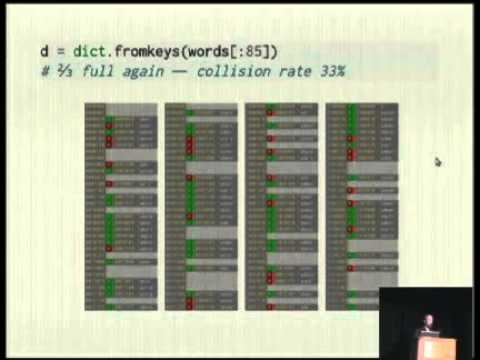

In [261]:
from IPython.display import YouTubeVideo
YouTubeVideo("C4Kc8xzcA68", width="60%")

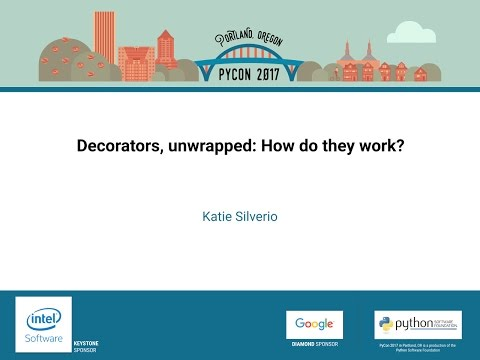

In [262]:
YouTubeVideo("66P5FMkWoVU", width="60%")

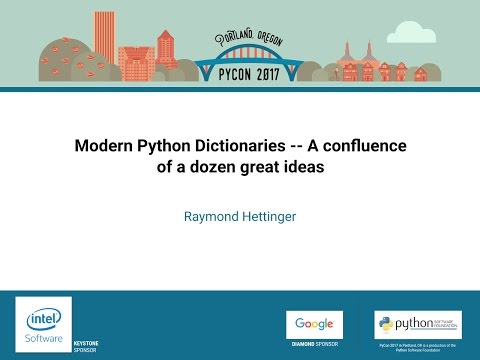

In [263]:
YouTubeVideo("npw4s1QTmPg", width="60%")

The `dict` type's order has been worked on in many PEPs in recent years:
- [PEP 412](https://www.python.org/dev/peps/pep-0412/): Key-Sharing Dictionary
- [PEP 468](https://www.python.org/dev/peps/pep-0468/): Preserving the order of \*\*kwargs in a function
- [PEP 520](https://www.python.org/dev/peps/pep-0520/): Preserving Class Attribute Definition Order